# Overfitting
## In this lab, we are going to explore how thoughtfully choosing a model and using test set are important parts of avoiding overfitting. 

We are going to apply these concepts to a classification model. We want to develop a decision boundary, on one side of which we have class A and on the other we have class B.

Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever), and sucks only slightly less than overfitting. At least your model performs consistently bad :)


### First, we are going to generate some synthetic data. To make these concepts visual, we are going to generate this data to be concentric circles. Run the code below to do so. 

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import sklearn

# Makin' some data
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

### As our classification algorithm, we are going to use a type of SVM with a radial basis function. This basically works by mapping each point into a higher dimensional space that can be split by the SVM (gross oversimplificaiton). That looks something like this:
![RBFSVM.png](../images/RBFSVM.png)

### We can change thecomplexity of the decision boundaries applied by the SVM by changignt the size of the radial basis function, through the parameter 'gamma'.

Instantiate a list of three SVM classifiers with three different gamma parameters, (.001, 1, and 20).

In [6]:
# Importing the required lirbaries for Suport Vector Classifiers 
from sklearn.svm import SVC

# Creating three instances of SVC with different gamma parameters. 
clf_001 = SVC(gamma=0.001)
clf_1 = SVC(gamma=1)
clf_20 = SVC(gamma=20)

# Creating a list of three SPVCs
classifiers = [clf_001, clf_1, clf_20]

# Creating a list of names for each SPC (Required for the cell below)
names = ['SPM_001', 'SPM_1', 'SPM_20']

### Now, we are going to plot the boundaries created by each of these classifiers with the points we generated. Run the following code to make three graphs of each SVM classifier.

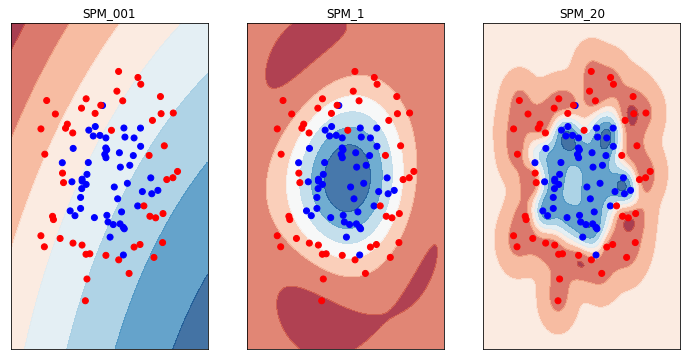

In [7]:
from matplotlib.colors import ListedColormap

figure = plt.figure(figsize=(12, 6))
i = 1
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1
plt.show()

### Where the contour is red, we will predict red, and same for blue; white means there is a 50/50 chance of either class
Explain what you see in the plots above.

Which gamma do you think fits the data best? 

What would you select as the opitmal gamma?

As stated in the heading, we can see that where the contour is red we will predict red, where the colour is blue we will predict blue. On the other hand, where it is white, there's a 50-50 chance to get either a blue or red value. 

I think that the gamma that better fits the model is the third one, with gamma equals to 20. However, maybe this is not quite generic and it is overfitted, and then with new data we are not able to predict the color in an accurated way. 

What we can say is that with gamma = 0.001 the model is not accurated at all. With gamma = 1, the model performs quite good from my point of view

### Without having used a training and testing set, lets see what our accuracy score would be for, for example, a gamma of .7. Use the .score() method.

In [9]:
# Creating a model with gamma 0.7 
clf_07 = SVC(gamma=0.7)

# Fitting the model to X and y 
clf_07.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
# Calculating the score
clf_07.score(X,y)

0.93

### Wow thats good accuracy! But is it generalizable? Make a test/train split and see how the model performs on the SVM with the gamma of 20. 

In [17]:
# Importing  train_test_split method from model_selection library in sklearn 
from sklearn.model_selection import train_test_split

# Splitting data intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fitting the data with our train data 
clf_20.fit(X_train, y_train)

# Printing the score for x_train and y_train 
clf_20.score(X_train, y_train)

0.975

In [18]:
# Printing the score for x_test and y_test 
clf_20.score(X_test, y_test)

0.85

The model performs worse on the test data rather than on the train data. This is a synonim of overfitting. 

### Try with some of the other gammas to see how the accuracy score changes after implementing a test/train split. 

We already have the data split into train and test. Then, we will check the score for train and test for the gammas we have considered before

### gamma = 0.001

In [19]:
# Fitting the data with our train data 
clf_001.fit(X_train, y_train)

# Printing the score for x_train and y_train 
clf_001.score(X_train, y_train)

0.5375

In [20]:
# Printing the score for x_test and y_test 
clf_001.score(X_test, y_test)

0.35

### gamma = 0.7

In [25]:
# Fitting the data with our train data 
clf_07.fit(X_train, y_train)

# Printing the score for x_train and y_train 
clf_07.score(X_train, y_train)

0.9375

In [26]:
# Printing the score for x_test and y_test 
clf_07.score(X_test, y_test)

0.8

### gamma = 1

In [21]:
# Fitting the data with our train data 
clf_1.fit(X_train, y_train)

# Printing the score for x_train and y_train 
clf_1.score(X_train, y_train)

0.9

In [22]:
# Printing the score for x_test and y_test 
clf_1.score(X_test, y_test)

0.8

### gamma = 20

In [23]:
# Fitting the data with our train data 
clf_20.fit(X_train, y_train)

# Printing the score for x_train and y_train 
clf_20.score(X_train, y_train)

0.975

In [24]:
# Printing the score for x_test and y_test 
clf_20.score(X_test, y_test)

0.85

`Insights`: 

From the cells above we can see that when gamma is low, the performance of the algorithm in the test set is bad. When increasing gamma, the test performance is better. The maximum score happens when gamma=20, but in this case the performance in the test set is way worse than in the train set. Than means overfitting. I would say that the best performance is when gamma is around 0.7 and 1. 

### Was your previous model overfitting? If so, how would you try to improve this model to prevent this?

Data, we could say that the previous model was overfitted. In this case, we could improve the model by doing a cross-validation to see the performance in different cases. Also, we could improve the model by limiting the value of gamma where overfitting starts appearing. 